In [1]:
def plot_graph_mean_std(data, best_epochs):
    c = ['b','g','c','r','k','y','m']
    c_i=0
    fig1 = plt.figure(figsize=(5, 5))  # ERRROR
    fig2 = plt.figure(figsize=(5, 5))  # ERRROR
    ax11 = fig1.add_subplot(111)
    ax12 = fig2.add_subplot(111)
    fig3 = plt.figure(figsize=(5, 5))  # ACCURACY
    fig4 = plt.figure(figsize=(5, 5))  # ACCURACY
    ax21 = fig3.add_subplot(111)
    ax22 = fig4.add_subplot(111)
    for i in data.keys():
        # plot each data dataset's validation and train
        _data = data[i]
        # plot the accuracy for each layer
        _tr_acc = _data['train_acc']
        _tr_err = _data['train_err']
        _val_acc = _data['val_acc']
        _val_err = _data['val_err']
        _x = np.arange(0, len(_tr_err['mean']))
        ax11.set_xlabel('epoch')
        ax11.set_ylabel('training error')
        ax11.plot(_x, _tr_err['mean'], label=i, c=c[c_i])
        ax11.fill_between(
            _x,
            _tr_err['mean'] - _tr_err['std'],
            _tr_err['mean'] + _tr_err['std'],
            alpha=.3, color=c[c_i])
        ax12.set_ylabel('validation error')
        ax12.set_xlabel('epoch')
        ax12.plot(
            _x, _val_err['mean'], label=i, color=c[c_i])
        ax12.fill_between(
            _x,
            _val_err['mean'] - _val_err['std'],
            _val_err['mean'] + _val_err['std'],
            alpha=.3, color=c[c_i])

        ax21.set_xlabel('epoch')
        ax21.set_ylabel('training accuracy')
        ax21.plot(_x, _tr_acc['mean'], label=i, c=c[c_i])
        ax21.fill_between(
            _x,
            _tr_acc['mean'] - _tr_acc['std'],
            _tr_acc['mean'] + _tr_acc['std'],
            alpha=.3, color=c[c_i])
        ax22.set_ylabel('validation accuracy')
        ax22.set_xlabel('epoch')
        ax22.plot(_x, _val_acc['mean'], label=i, c=c[c_i])
        ax22.fill_between(
            _x,
            _val_acc['mean'] - _val_acc['std'],
            _val_acc['mean'] + _val_acc['std'],
            alpha=.3, color=c[c_i])
        
        ax11.set_title('TRAINING')
        ax12.set_title('VALIDATION')
        ax12.legend(loc=0)
        ax22.legend(loc=0)
        ax22.scatter(best_epochs[i]['idx'], best_epochs[i]['mean'], c=c[c_i], marker='v')
        c_i+=1
        
    return fig1, fig2, fig3, fig4

In [110]:
def simplePlot(stats, keys, stats_interval=1):
    """
    plot the training and validation error and accuracy
    """
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(6, 6))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(6, 6))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    return fig_1, fig_2


In [ ]:
def combinedSimplePlots(**kwargs):
    """
    name, stats, keys
    """
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    return fig_1, fig_2    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')

# Visualising CNN output

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import pickle as pkl
import numpy as np

# Baseline Models

## `1 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer((12x12x5,)),
    AffineLayer(12x12x5, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [145]:
# import data:
stats1, keys1, _,_ = pkl.load(open('./10_CNN/baseline/1layer/baseline_1layer_earlystop.pkl','rb'))
stats2, keys2,_ = pkl.load(open('./10_CNN/baseline/1layer/ottokar_BASELINE_1layer_ADAM.pkl', 'rb'))
_,stats3, keys3, _ = pkl.load(open('./10_CNN/baseline/1layer/ottokar_baseline1_NOEARLYSTOP_MOMENTUM.pkl','rb'))

In [146]:
best = np.argmax(stats3[:,keys3['acc(valid)']])
stats3[best,keys3['acc(valid)']]

0.8520886075949361

In [147]:
best = np.argmax(stats2[:,keys2['acc(valid)']])
stats2[best,keys2['acc(valid)']]

0.85829113924050593

In [139]:
data = [stats1,stats2,stats3]
k = [keys1, keys2, keys3]

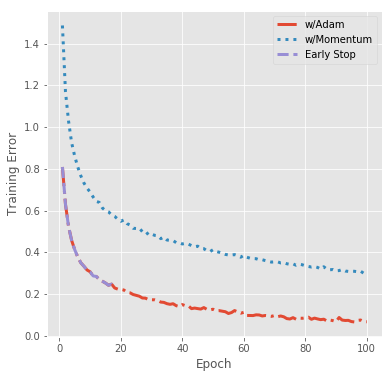

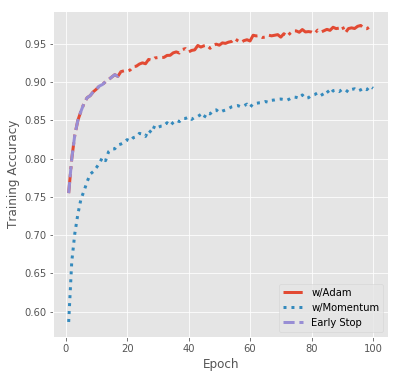

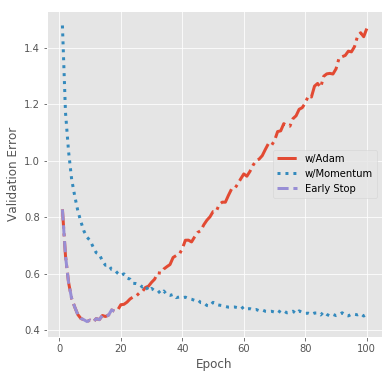

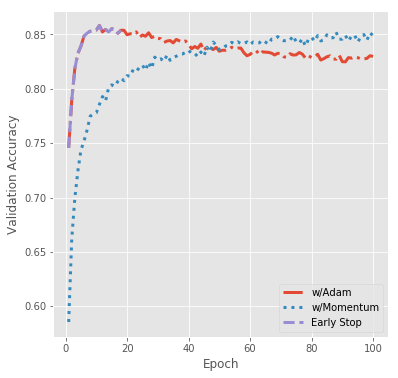

In [140]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6,6))
ax4 = fig4.add_subplot(111)
stats_interval=1
labels = ['Early Stop', 'w/Adam', 'w/Momentum']
style = ['--','-.',':']
for i in [1,2,0]:
    stats = data[i]
    keys = k[i]
    #     trainig error
    ax1.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(train)']],
                label=labels[i], linewidth=3, ls=style[i])
    #     training accuracy
    ax2.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(train)']],
                label=labels[i],linewidth=3 ,ls=style[i])
    #     validation error
    ax3.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(valid)']],
                label=labels[i],linewidth=3,ls=style[i])
    #     validation accuracy
    ax4.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(valid)']],
                label=labels[i],linewidth=3,ls=style[i])
    

ax1.legend(loc='best')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Error')
ax2.legend(loc='best')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Accuracy')
ax3.legend(loc='best')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Error')
ax4.legend(loc='best')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Accuracy')

In [141]:
fig3.savefig('./CNN_1layer_val_err.pdf', format='pdf', bbox_inches='tight')
fig4.savefig('./CNN_1layerval_acc.pdf', format='pdf', bbox_inches='tight')

## `2 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 5,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(5,12,12)),
    ConvolutionalLayer(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 10,)),
    AffineLayer(4*4*10, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [114]:
model1,stats1,keys1,_ = pkl.load(open('./10_CNN/baseline/2layer/melchoir_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))
model2,stats2,keys2,_ = pkl.load(open('./10_CNN/baseline/2layer/penman_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))
model3,stats3,keys3,_ = pkl.load(open('./10_CNN/baseline/2layer/ottokar_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))

In [34]:
stats4,keys4,_,_ = pkl.load(open('./10_CNN/baseline/2layer/BASELINE2_EARLYSTOP_1.pkl','rb'))

In [41]:
stats5,keys5,_ = pkl.load(open('./10_CNN/baseline/2layer/ottokar_BASELINE_2layer_momentum.pkl','rb'))

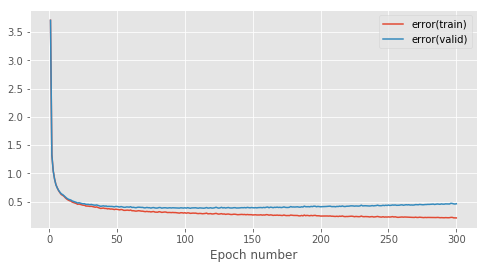

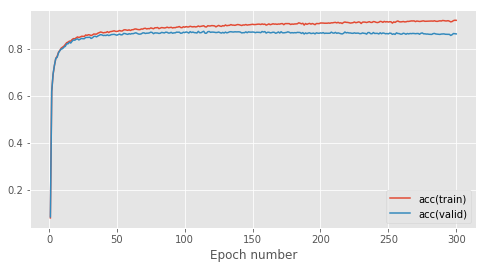

In [57]:
simplePlot(stats1,keys1)

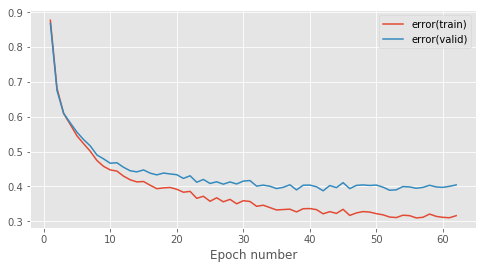

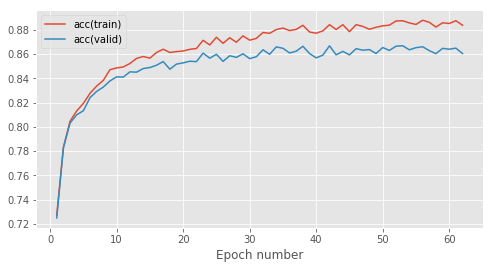

In [55]:
simplePlot(stats4,keys4)

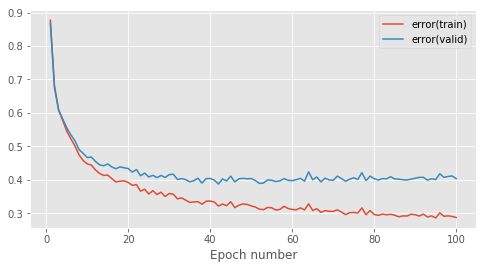

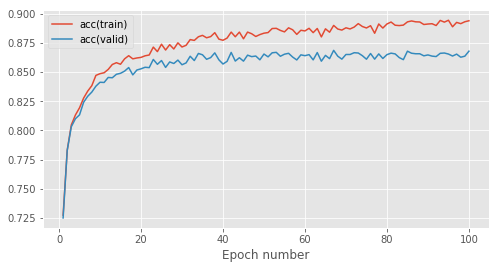

In [56]:
simplePlot(stats5,keys5)

## Combined graph

In [115]:
data = [stats1,stats2,stats3]
k = [keys1, keys2, keys3]

In [116]:
STATS_300 = {}
STATS_300['val_err'] = []
STATS_300['val_acc'] = []
STATS_300['train_err'] = []
STATS_300['train_acc'] = []
STATS_300['test_acc'] = []
for stats,keys in zip(data,k):
    STATS_300['val_err'].append(stats[1:, keys['error(valid)']])
    STATS_300['val_acc'].append(stats[1:, keys['acc(valid)']])
    STATS_300['train_err'].append(stats[1:, keys['error(train)']])
    STATS_300['train_acc'].append(stats[1:, keys['acc(train)']])
    STATS_300['test_acc'].append(stats[1:, keys['acc(test)']])


In [117]:
from mlp.helper import generate_mean_std, analyse_mean_std

In [118]:
stats_300_mu_rho = generate_mean_std({'stats_300': STATS_300})
best_epoch = analyse_mean_std(stats_300_mu_rho)

In [23]:
best_epoch

{'stats_300': {'idx': 113,
  'mean': 0.87335443037974703,
  'std': 0.0,
  'test_acc_mean': 0.86132911392405065,
  'test_acc_std': 0.0}}

Text(0,0.5,'Validation Accuracy')

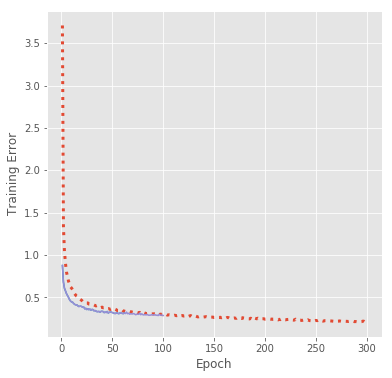

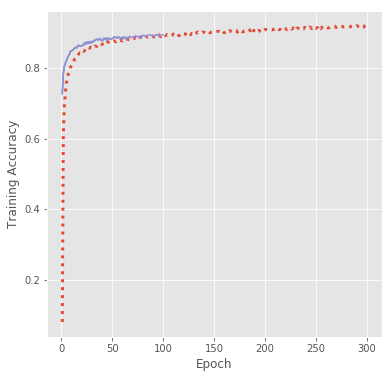

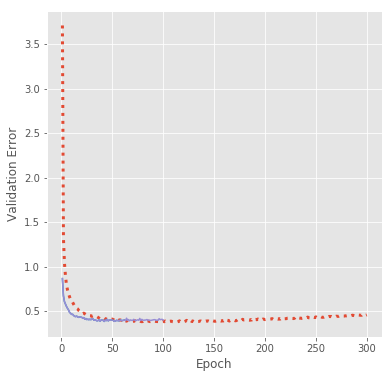

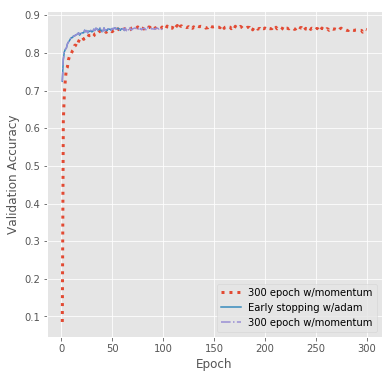

In [52]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6,6))
ax4 = fig4.add_subplot(111)
stats_interval=1
labels = ['Early Stop', 'w/Adam', 'w/Momentum']
style = ['--','-.',':']
xs = np.arange(1, 301)

#     trainig error
tr_err = stats_300_mu_rho['stats_300']['train_err']
ax1.plot(xs,
            tr_err['mean'], linewidth=3, ls=':')
ax1.fill_between(xs,
                tr_err['mean'] - tr_err['std'],
                tr_err['mean'] + tr_err['std'], alpha=.5)
ax1.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['error(train)']])
ax1.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['error(train)']])

#    training accuracy
tr_acc = stats_300_mu_rho['stats_300']['train_acc']
ax2.plot(xs,
            tr_acc['mean'], linewidth=3, ls=':')
ax2.fill_between(xs,
                tr_acc['mean'] - tr_acc['std'],
                tr_acc['mean'] + tr_acc['std'], alpha=.5)
ax2.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['acc(train)']])
ax2.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['acc(train)']])

#     validation error
val_err = stats_300_mu_rho['stats_300']['val_err']
ax3.plot(xs,
            val_err['mean'], linewidth=3, ls=':')
ax3.fill_between(xs,
                val_err['mean'] - val_err['std'],
                val_err['mean'] + val_err['std'], alpha=.5, )
ax3.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['error(valid)']])
ax3.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['error(valid)']])

#     validation accuracy
val_acc = stats_300_mu_rho['stats_300']['val_acc']
ax4.plot(xs,
            val_acc['mean'], linewidth=3, ls=':', label='300 epoch w/momentum')
ax4.fill_between(xs,
                val_acc['mean'] - val_acc['std'],
                val_acc['mean'] + val_acc['std'], alpha=.5)    
ax4.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['acc(valid)']], label='Early stopping w/adam')
ax4.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['acc(valid)']], ls='-.', label='300 epoch w/momentum')


ax1.legend(loc='best')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Error')
ax2.legend(loc='best')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Accuracy')
ax3.legend(loc='best')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Error')
ax4.legend(loc='best')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Accuracy')

---
# 2Conv + 4DNN

In [105]:
layer2_4dnn_2 = pkl.load(open('./10_CNN/baseline/2layer_4DNN/gCloud_BASELINE_2layer_4DNN.1.pkl','rb'))

In [148]:
stats = layer2_4dnn_2[0]
keys = layer2_4dnn_2[1]
best = np.argmax(stats[:,keys['acc(valid)']])
stats[best,keys['acc(valid)']]

0.87411392405063226

In [149]:
best

14

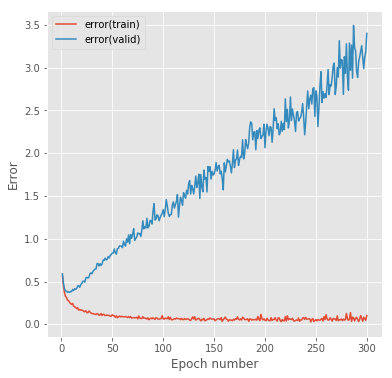

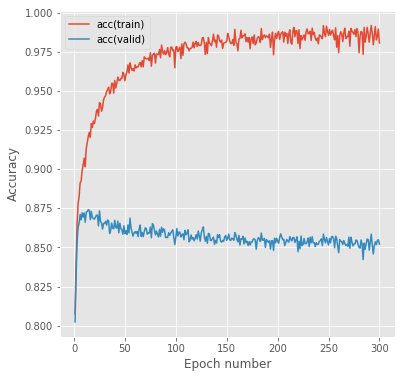

In [111]:
fig1, fig2 = simplePlot(layer2_4dnn_2[0], layer2_4dnn_2[1], stats_interval=1)

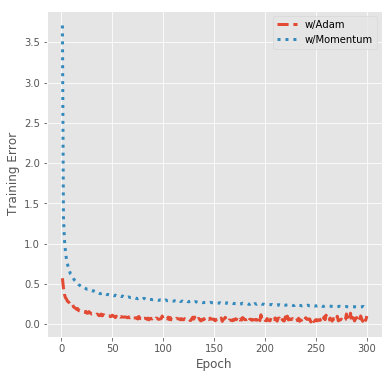

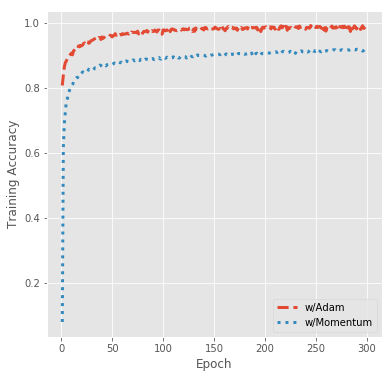

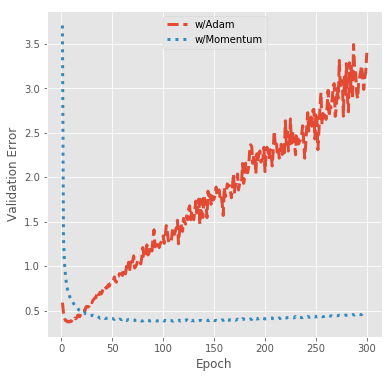

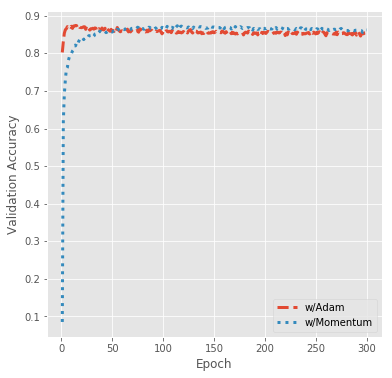

In [135]:
fig1 = plt.figure(figsize=(6, 6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6, 6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6, 6))
ax4 = fig4.add_subplot(111)
stats_interval = 1
labels = [ 'w/Momentum', 'w/Adam']
style = ['--', '-.', ':']

xs = np.arange(1, stats.shape[0])
stats_interval = 1
stats = layer2_4dnn_2[0]
keys = layer2_4dnn_2[1]

#     trainig error
ax1.plot(
    xs, stats[1:, keys['error(train)']], linewidth=3, ls='--', label=labels[1])
tr_err = stats_300_mu_rho['stats_300']['train_err']
ax1.plot(xs, tr_err['mean'], linewidth=3, ls=':', label=labels[0])

#     training accuracy
ax2.plot(
    xs, stats[1:, keys['acc(train)']], label=labels[1], linewidth=3, ls='--')
tr_acc = stats_300_mu_rho['stats_300']['train_acc']
ax2.plot(xs, tr_acc['mean'], linewidth=3, ls=':', label=labels[0])

#     validation error
ax3.plot(
    xs, stats[1:, keys['error(valid)']], label=labels[1], linewidth=3, ls='--')
val_err = stats_300_mu_rho['stats_300']['val_err']
ax3.plot(xs, val_err['mean'], label=labels[0], linewidth=3, ls=':')

#     validation accuracy
ax4.plot(
    xs, stats[1:, keys['acc(valid)']], label=labels[1], linewidth=3, ls='--')
val_acc = stats_300_mu_rho['stats_300']['val_acc']
ax4.plot(xs, val_acc['mean'], linewidth=3, ls=':', label=labels[0])

ax1.legend(loc='best')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Error')
ax2.legend(loc='best')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Accuracy')
ax3.legend(loc='best')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Error')
# ax3.set_yscale('log')
ax4.legend(loc='best')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Accuracy')


In [136]:
fig3.savefig('./CNN_baseline2layer_valError.pdf', format='pdf', bbox_inches='tight')
fig4.savefig('./CNN_baseline2layer_valAcc.pdf', format='pdf', bbox_inches='tight')

# Extension to baseline

## 1 Layer with dropout

    DropoutLayer(rng=rng, incl_prob=0.8, share_across_batch=True),
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-5)),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(),
    AffineLayer(12*12*5, 400,weights_init, biases_init, L2Penalty(1e-5)),
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    ReluLayer(),
    AffineLayer(400, output_dim, weights_init, biases_init, L2Penalty(1e-5)),

In [150]:
model1, stats1, keys1 ,_  = pkl.load(open('./10_CNN/pyramid/convNet_1layer_wDropout.pkl', 'rb'))
# stats2, keys2, _, best_epoch, best_model, param = pkl.load(open('./10_CNN/pyramid/convNet_1layer_wDropout3.pkl', 'rb'))

In [151]:
best = np.argmax(stats1[:,keys1['acc(valid)']])
stats1[best,keys1['acc(valid)']]

0.83240506329113928

In [152]:
best

36

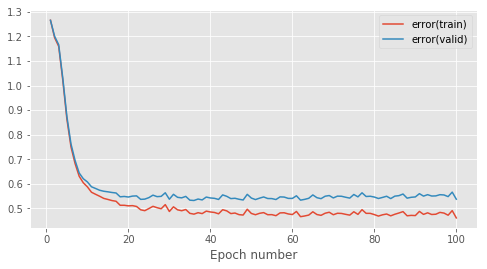

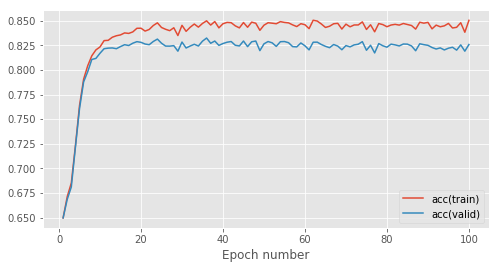

In [10]:
simplePlot(stats1, keys1)

In [13]:
model1_params = model1.params

In [36]:
len(model1_params)

4

In [39]:
model1_params[1].shape

(5,)

In [16]:
kernels = model1.params[0]

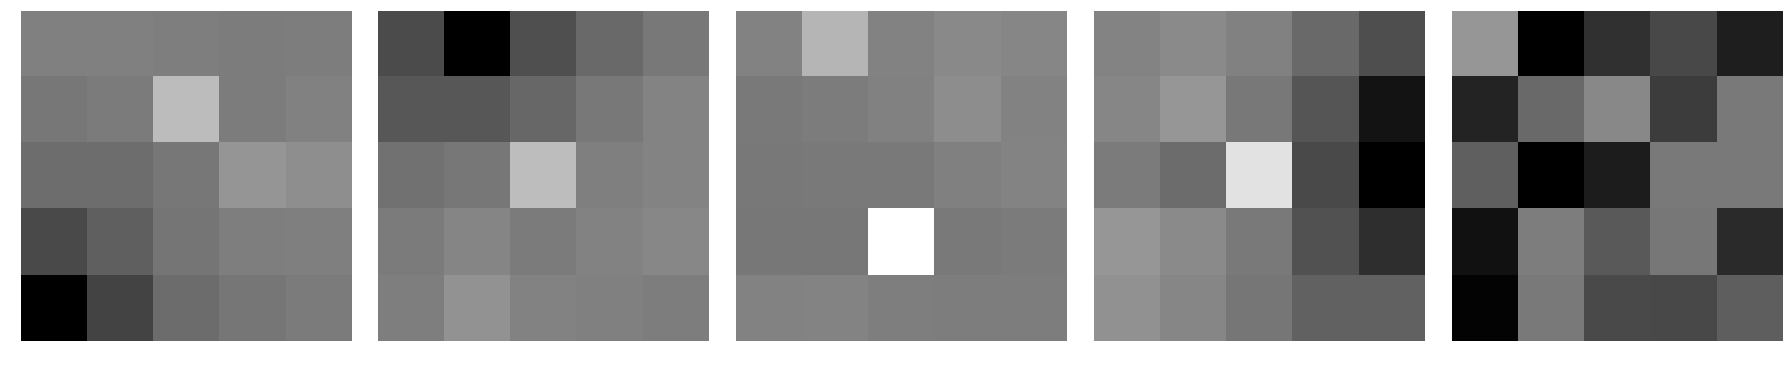

In [33]:
f = plt.figure(figsize=(25,5))

for i in range(5):
    ax = f.add_subplot(1,5,i+1)
    k = kernels[i,:,:,:]
    max_abs = np.abs(k).max()
    ax.imshow(k.reshape(5,5),cmap=plt.get_cmap('gray'), vmin=-max_abs, vmax=max_abs)
    ax.axis('off')
f.tight_layout()

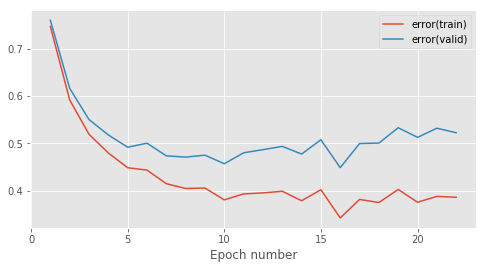

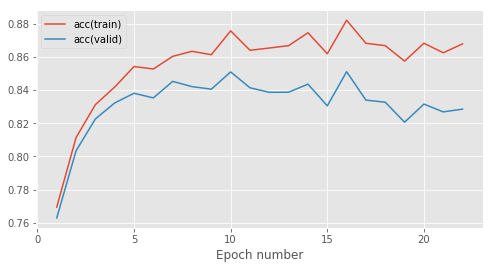

In [22]:
simplePlot(stats2, keys2)

## 2 Later with dropout and BN

    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-6)),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReluLayer(),
    ConvolutionalLayer(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-6)),
    MaxPoolingLayer(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReluLayer(),
    ReshapeLayer(output_shape=(4 * 4 * 10,)), # TWO HIDDEN LAYER
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    AffineLayerWithoutBias(4*4*10, 400, weights_init, weights_penalty=L2Penalty(1e-6)),
    BatchNormalizationLayer(input_dim=(400), rng=rng),
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    AffineLayerWithoutBias(400, 400, weights_init, weights_penalty=L2Penalty(1e-6)),
    BatchNormalizationLayer(input_dim=(400), rng=rng),
    ReluLayer()
    AffineLayer(400, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(1e-6))

In [3]:
statsE1, keysE1, _, best_epochE1, modelE1, param_statsE1 = pkl.load(
    open('./10_CNN/pyramid/2conv_2DNN_BN_DROPOUT_REG_ADAM_1e-1.pkl', 'rb'))
statsE3, keysE3, _, best_epochE3, modelE3, param_statsE3 = pkl.load(
    open('./10_CNN/pyramid/2conv_2DNN_BN_DROPOUT_REG_ADAM_1e-3.pkl', 'rb'))

### Trial 1

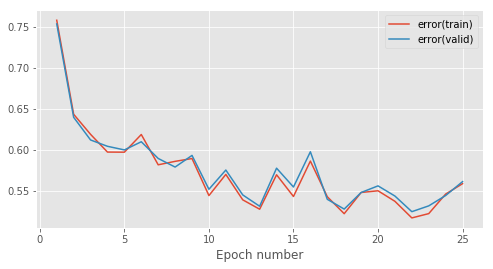

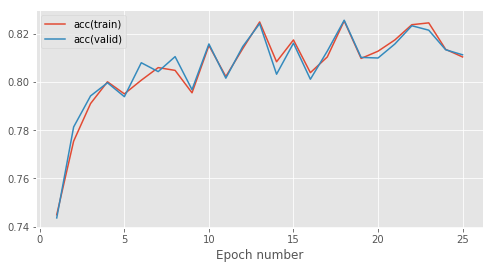

In [7]:
simplePlot(statsE1,keysE1)

In [10]:
statsE1[best_epochE1,keysE1['acc(valid)']]

0.81569620253164532

In [44]:
kernelsE1 = modelE1.params[0]

In [45]:
kernelsE1.shape

(5, 1, 5, 5)

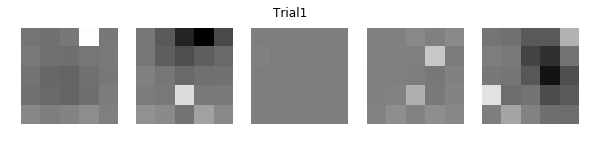

In [168]:
f = plt.figure(figsize=(10,2))
max_abs = np.abs(kernelsE1).max()

for i in range(5):
    ax = f.add_subplot(1,5,i+1)
    k = kernelsE1[i,:,:,:]
    ax.imshow(k.reshape(5,5),cmap=plt.get_cmap('gray'), vmin=-max_abs, vmax=max_abs)
    ax.axis('off')
f.suptitle('Trial1')
# f.tight_layout()

In [169]:
f.savefig('./trial1_conv1_kernels.pdf',format='pdf',bbox_inches='tight')

In [164]:
kernelsE12 = modelE1.params[2]

In [48]:
kernelsE12.shape

(10, 5, 5, 5)

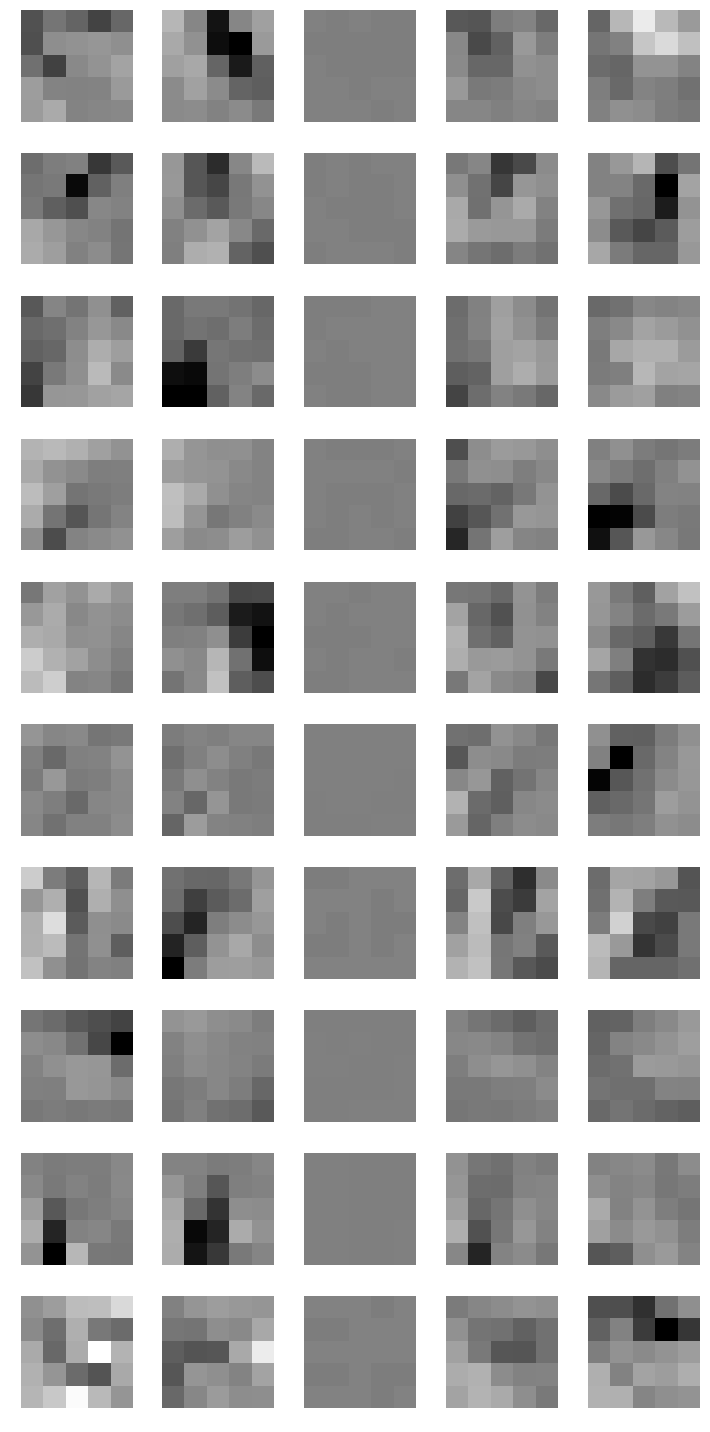

In [175]:
f = plt.figure(figsize=(10,20))
n=0

for i in range(10):
    for j in range(5):
        max_abs = np.abs(kernelsE12[i,:,:,:]).max()
        n+=1
        ax = f.add_subplot(10,5,n)
        k = kernelsE12[i,j,:,:]
#         max_abs = np.abs(k).max()
        ax.imshow(k.reshape(5,5),cmap=plt.get_cmap('gray'), vmin=-max_abs, vmax=max_abs)
        ax.axis('off')
# f.suptitle('Second convolutional layer (trial1)')
f.tight_layout()
f.savefig('./trial1_conv2_kernels.pdf',format='pdf',bbox_inches='tight')

### Trial 2

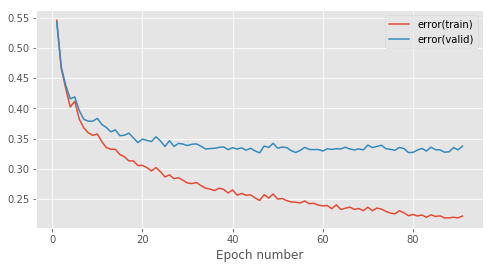

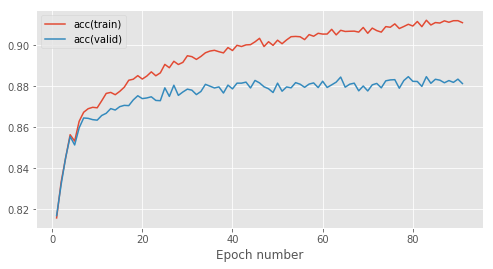

In [8]:
simplePlot(statsE3,keysE3)

In [5]:
best_epochE3

76

In [73]:
np.argmax(statsE3[:, keysE3['acc(valid)']])

79

In [98]:
statsE3[79,keysE3['acc(valid)']]

0.8846835443037977

In [179]:
statsE3[79,keysE3['acc(test)']]

0.87360759493670892

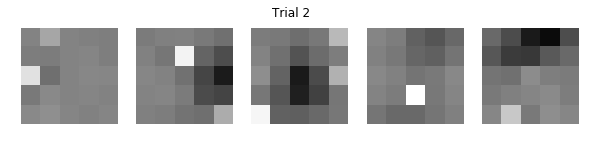

In [173]:
_kernels = modelE3.params[0]
f = plt.figure(figsize=(10,2))
max_abs = np.abs(_kernels).max()

for i in range(5):
    ax = f.add_subplot(1,5,i+1)
    k = _kernels[i,:,:,:]
    ax.imshow(k.reshape(5,5),cmap=plt.get_cmap('gray'), vmin=-max_abs, vmax=max_abs)
    ax.axis('off')
f.suptitle('Trial 2')
# f.tight_layout()

In [174]:
f.savefig('./trial2_conv1_kernels.pdf',format='pdf',bbox_inches='tight')

In [177]:
_kernels = modelE3.params[2]

In [96]:
_kernels.shape

(10, 5, 5, 5)

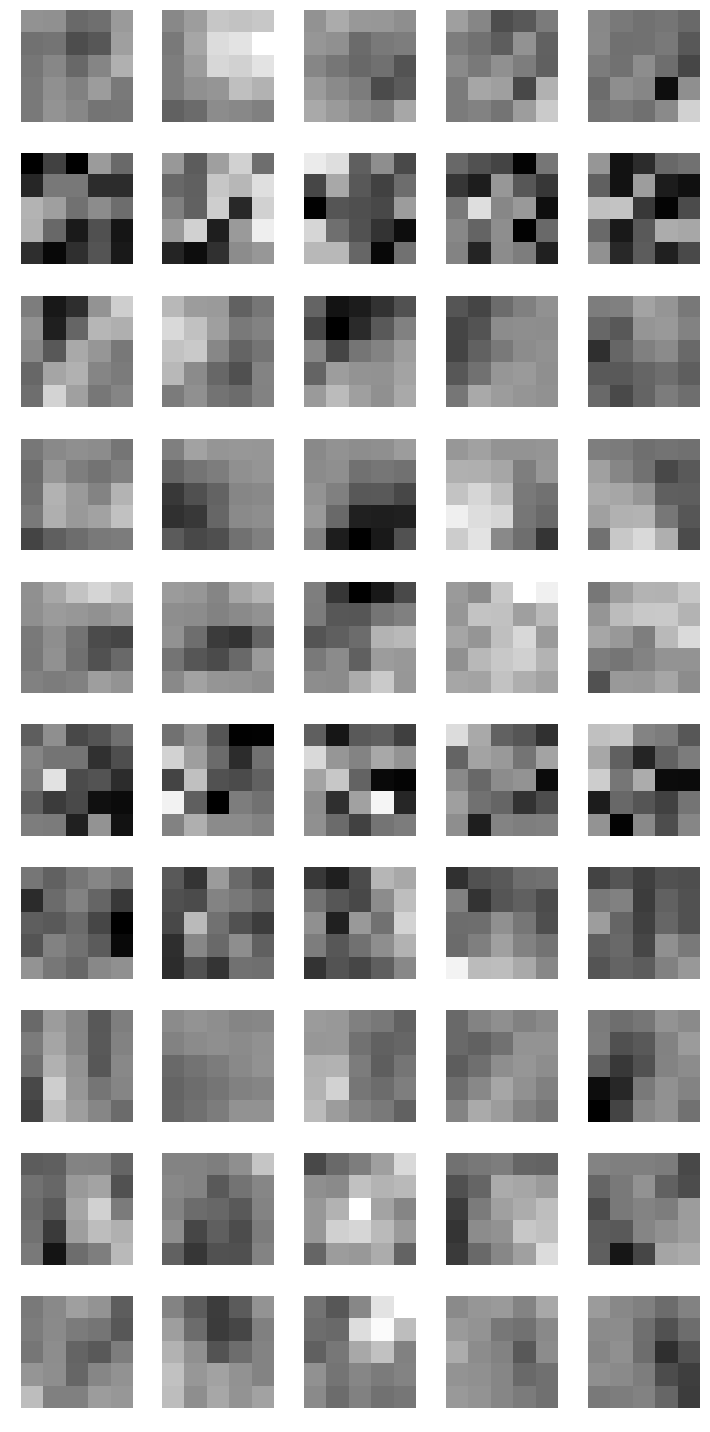

In [178]:
f = plt.figure(figsize=(10,20))
n=0
for i in range(10):
    for j in range(5):
        max_abs = np.abs(_kernels[i,:,:,:]).max()
        n+=1
        ax = f.add_subplot(10,5,n)
        k = _kernels[i,j,:,:]
#         max_abs = np.abs(k).max()
        ax.imshow(k.reshape(5,5),cmap=plt.get_cmap('gray'), vmin=-max_abs, vmax=max_abs)
        ax.axis('off')
f.tight_layout()
f.savefig('./trial2_conv2_kernels.pdf',format='pdf',bbox_inches='tight')

---
# LeNet5 Expt

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=20,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=20, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 20,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(20,12,12)),
    ConvolutionalLayer(
        num_input_channels=20,
        num_output_channels=50,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=50, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 50,)),
    ReluLayer(),
    AffineLayer(4 * 4 * 50, 400, HeNormalInit(fan_in = 4 * 4 * 50, rng=rng), biases_init),
    ReluLayer(),
    AffineLayer(400, output_dim, HeNormalInit(fan_in = 4 * 4 * 50,rng=rng), biases_init)
    
    
    Also tried with Xavier Ini (for affine layers)

In [5]:
lenet_1_xav1 = pkl.load(open('./10_CNN/lenetEXPT/leNet-XAVIER.pkl','rb'))
lenet_1_xav2 = pkl.load(open('./10_CNN/lenetEXPT/leNet-XAVIER_1.pkl', 'rb'))
lenet_1_he1 = pkl.load(open('./10_CNN/lenetEXPT/leNet.pkl','rb'))
lenet_1_he2 = pkl.load(open('./10_CNN/lenetEXPT/leNet_1.pkl','rb'))

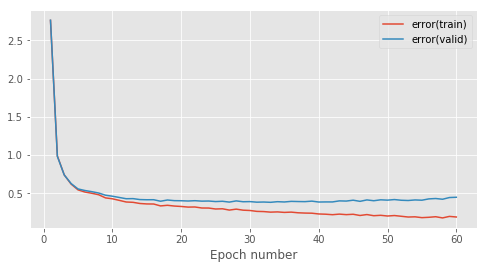

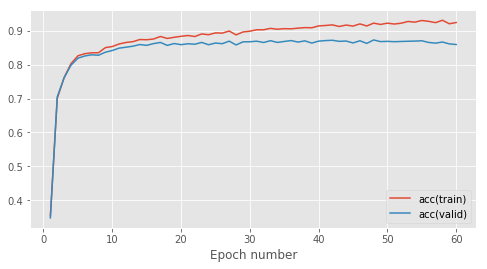

In [6]:
simplePlot(lenet_1_he1[0], lenet_1_he1[1], stats_interval=1)

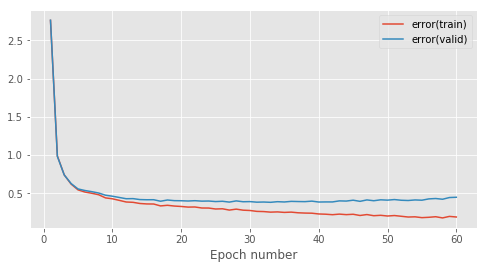

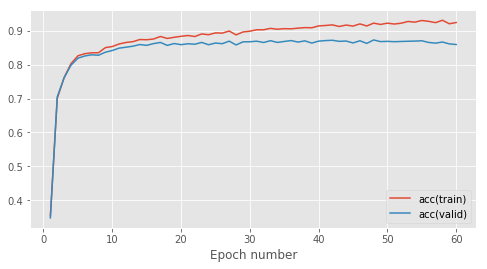

In [9]:
simplePlot(lenet_1_he2[0], lenet_1_he2[1], stats_interval=1)

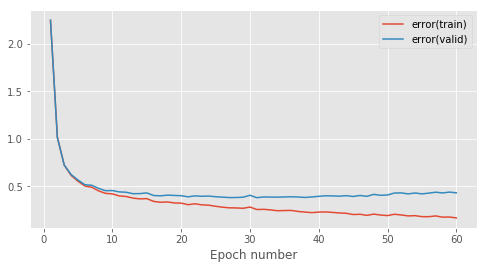

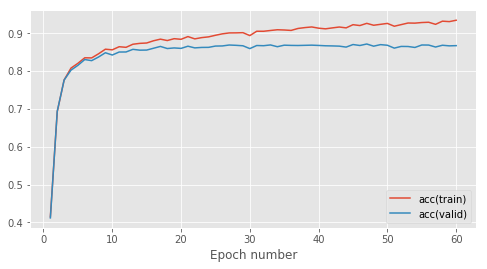

In [8]:
simplePlot(lenet_1_xav2[0], lenet_1_xav2[1], stats_interval=1)

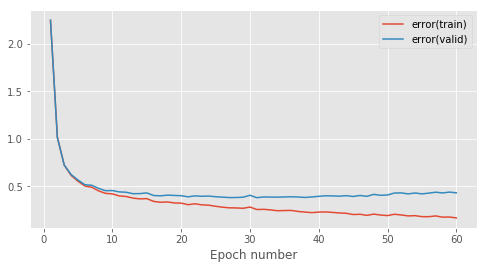

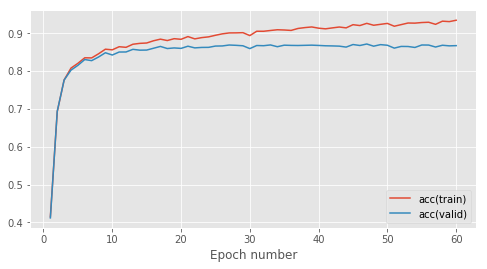

In [7]:
simplePlot(lenet_1_xav1[0], lenet_1_xav1[1], stats_interval=1)